# Bagging (Bootstrap Aggregation) vs Boosting

> *Bagging* It is a techinque to reduce the variance of estimated prediction function. Bagging seems to work
especially well for high-variance, low-bias procedures, such as *trees*. For
*regression*, we simply fit the same regression tree many times to bootstrapsampled
versions of the training data, and average the result. For *classification*,
a committee of trees each cast a vote for the predicted class.

> *Boosting* is an ensemble learning technique in machine learning that is used to improve the performance of weak learners (usually decision trees) by combining them to form a stronger model. The key idea behind boosting is to train models sequentially, where each model attempts to correct the mistakes of the previous ones. It is typically used for both regression and classification tasks.

## Boosting 

Boosting and Additive Trees

#### AdaBoost (Freund and Schapire)

For the explanation is used a classification model, but we can apply the same idea for regression model.

So we start here:

* The output variable $Y$ is coded as $\mathcal{K}= \{0, 1,...K-1 \}$

* Given a vector of predictor variables $X$, a classifier $G(X)$ produces a prediction taking one class of $\mathcal{K}$. 

* The error rate on *training sample* is computed:
$$\bar{\text{err}} = \frac{1}{N} \sum_{i=1}^{N} I(y_i \ne G(x_i) )$$

* And the expected error for the future $E[I(y_i \ne G(x_i) )]$

* For final prediction Boosting uses $G(x)$ as a classifier. It is made up by `weak classifier` $G_m(x)$, a classifier whose error rate is slightly better than random guessing. 

> A *weak classifier* generally used is *tree*. The structure of this *tree* only contains a *node* and two *leaves*. This structure of tree is  called **stumps** as well.  
> 
> This structures only allow to *use one feature* to *make a decision*

* As we said, the final prediction that Boosting uses is made up by *weak classifiers* (*stumps*). The importances or votes of of those *stumps* are not *balanced*, the importances depends on the *power of correct classification*. A  stump with *better power of correct classification* has more *about to say* than others.

* Boosting method sequentially applies the *weak classification* algorithm to repeatedly modified versions of the data (weighted data). The data is weighted using $w_i$ in each iteration.

The response of the *Classification Tree*

$$\hat{f}(x) = \sum_{n=1}^{|T|} k_n I_{\{x_i \in R_n\}} $$

where $k_n = \argmax_{k} {\hat{p}_{nk}}$, $\hat{p}_{nk} = \frac{1}{N_{n}}\sum_{x_i \in R_n} I(y_i = k)$ and the $|T|$ is the quantity of terminal nodes.

If we set $|T|=2$ (for weak classfier)

* So, it produces a sequence of weak classifiers $G_m(x), m = 1, 2, . . . , M.$ 

$$G_m(x) = \sum_{n=1}^{2} k_n I_{\{x_i \in R_n\}} $$

$$G(x) = k^* =\sum_{m}^{M} G_m \alpha_m$$

* $\alpha_m$ (*about to say*) and $G_m$ are computed by boosting algorithm. They point out the contribution of each respective  $G_m(x)$ And $M$ is the amount of resampling.

  *Boosting method*

  * 1. Initialize the weights $w_i = 1/N$, $i = 1, 2, ..., N$
  * 2. For $m = 1$ to $M$:
  
    * Fit the classifier $G_m(x)$ to the training data using the weights $w_i$

    * Compute (*error rate*) $\text{err}_m = \frac{\sum_{i=1}^{N} I(y_i \ne G(x_i) )}{N} $

    <!-- * Compute $\text{err}_m = \frac{\sum_{i=1}^{N} w_i I(y_i \ne G(x_i) )}{\sum_{i=1}^{N} w_i} $ -->
    
    * Compute (log of ratio of *accuracy* vs *error rate*)  $ α_m = \log((1 − \text{err}_m)/\text{err}_m)$
    
    * Set (weights are updated for *misclassification* record) $w_i \leftarrow w_i.\exp[\alpha_m I(y_i \ne G(x_i) )] $
    
  
  * 3. $G(x) := k^* =\sum_{m}^{M} G_m \alpha_m$

Where $\sum_{i=1}^{N}w_i = 1$ 
<!-- and  $\text{err}_m$ compute the *weighted error rate*, that is, missclassification on some records is more important than others. -->

Here $α_m$ compute the *about to say* of the *stump* (tree). If the $\text{err}_m$ is lower *about to say* of the current *stump* is greater, the power of prediction is greater.

In actually this is a log of $\text{odds}$ of $\text{correct}_m$, such as, $\text{correct}_m = 1 - \text{err}_m $ and $\text{correct}_m^{C} = \text{err}_m $

> *Odds*
> 
> The *odds* of an event $A$ are $ \text{odds}(A) = P(A)/P(A^c)$
>
> If $P(A) = 2/3$, we say the odds in favor of $A$ are $2$ to $1$

This $\alpha_m$ will be used to compute the updates on $w_i$, if the $i^{th}$ record is misclassified in the *weak classifier*.

The weights for missclassified recods is increased in order to for the next iteration (next *stumps* or trees) specializes in classified those records. So in each successive classifier is thereby forced to concentrate on those training observations that are missed by previous ones in the sequence.

Recall in each iteration the weights are *rescaled* in order to sum $1$.

<!-- * The data modifications at each boosting step consist of applying weights $w_1, w_2, . . . , w_N$ to each of the training observations $(x_i, y_i), i = 1, 2, . . . , N.$ Initially all of the weights are set to $w_i = 1/N$.

* For each successive iteration $m = 2, 3, . . . , M$ the observation weights are individually modified and the classification algorithm is reapplied to the weighted observations

* At step $m$, *those observations that were misclassified* by the classifier $G_{m−1}(x)$ induced at the previous step have their *weights increased*, whereas the *weights are decreased* for *those that were classified correctly*. 

* Thus as iterations proceed, `observations that are difficult to classify correctly receive ever-increasing influence`. Each successive classifier is thereby forced to concentrate on those training observations that are missed by previous ones in the sequence. -->

* Data sets are often very large in terms of number of observations and number of variables measured on each of them. Thus, computational considerations play an important role. 

* The inputs tend to be mixtures of quantitative, binary, and categorical variables. Also they include `NaN`. The scales also are different in the variables.

* The relevant variables that in actually are need to predict are small, but we don't know what are.

* The interpretation of the models are useful in order to know the relationship between the inputs variables and the output.

> An `off-the-shelf` method is one that can be directly applied to the data without requiring a great deal of timeconsuming data preprocessing or careful tunning of the learning procedure.

* The decision tree is the method that is close to *off-the-shelf*.  They are relatively fast to construct and they produce interpretable models. They are invariant under (strictly monotone) transformations of the individual predictors and inmute to outliers. They are thereby resistant to the inclusion of many irrelevant predictor variables. The disadvantage is the accuracy, this is improved with the boosting, but we sacrify the speed and interpretability.

### Boosting Trees

The tree methods partition the space of all join predictor variable values into disjoint regions $R_j, j = 1, 2, ..., J$, as represented by the terminal nodes of the tree.

A constant $γ_j$ is assigned to each such region and the predictive rule is

$$x ∈ R_j ⇒ f(x) = γ_j.$$


Thus a tree can be formally expressed as

$$T(x; Θ) = \sum_{j = 1}^{J} γ_jI(x ∈ R_j)$$

with parameters $Θ = \{R_j, γ_j\}^J$

The parameters are found by minimizing the empirical risk (loss function)

$$ \hat{Θ} = \arg\min_Θ \sum_{j=1}^{J} \sum_{x_i \in R_j} L(y_i, γ_j)$$

The union of all disjoin regions result the total sample $N$
 
$$ \hat{Θ} = \arg\min_Θ \sum_{i=1}^{N} {L}(y_i, T(x_i, Θ)) $$

 It is useful to divide the optimization problem into two parts:

 1. Finding $R_j$: Here implicitly we choice the feature in wich the we will divide the regions.

 2. Finding $γ_j$ given $R_j$: Given the $R_j$, estimating the $γ_j$ is typically trivial, and often $γ_j = \bar{y}_j$, the mean of the $y_i$ falling in region $R_j$ for regression problem.

The *boosted tree model* is a sum of such trees

$$ f_M(x) = \sum_{m=1}^M  T(x; Θ_m)$$

At $m$ step in the forward stagewise procedure one must solve

$$ \hat{Θ}_m = \arg \min_{{Θ_m}} \sum_{i=1}^{N} L(y_i, f_{m- 1 }(x_i) + T(x_i, {Θ}_m )) $$


for the region set and constants $Θ_m = \{R_{j_m}, γ_{j_m}\}^J$ and the current model $f_{m−1}(x)$

Given the regions $R_{j_m}$, finding the optimal constants $γ_{j_m}$ in each region is typically straightforward:



$$\hat{γ_j}_m = \arg\min γ_{j_m} \sum_{x_i ∈ R_{j_m}} L (y_i, f_{m−1}(x_i) + γ_{j_m})$$

- For *regression* problem it the mean.
- For *classification* problem we apply above solution

Modal class in statistics refers to a class having the highest frequency
pag 372

### Regularization


Each iteration
usually reduces the training error, so that for $M$ large enough this error
can be made arbitrarily small. However, fitting the training data too well
can lead to `overfitting`, which degrades the risk on future predictions. Thus,
there is an optimal number $M^∗$ minimizing future risk that is application
dependent. A convenient way to estimate $M^∗$ is to monitor prediction risk
as a function of $M$ on a *validation sample*. The value of $M$ that minimizes
this risk is taken to be an estimate of $M^∗$.

### Interpretation

#### Relative Importance of Predictor Variables

This is related to *improvements* (*reduction in error*) that can generate a variable  

For a single decision tree $T$ , Breiman et al. (1984) proposed

$$I^2_ℓ(T) = \sum_{t=1}^{J−1} \hat{ı}_t^2 I(v(t) = ℓ)$$

as a measure of relevance for each predictor variable $X_ℓ$. The sum is over
the $J − 1$ internal nodes of the tree. At each such node $t$, one of the input
variables $X$
$v(t)$ is used to partition the region associated with that node into
two subregions; within each a separate constant is fit to the response values.
The particular variable chosen is the one that gives maximal estimated
improvement $\hat{ı}^2_t$ in squared error risk over that for a constant fit over the
entire region. The squared relative importance of variable $X_ℓ$ is the sum of
such squared improvements over all internal nodes for which it was chosen
as the splitting variable.


This importance measure is easily generalized to additive tree expansions
(10.28); it is simply averaged over the trees

$$ I^2_ℓ = \frac{1}{M} \sum_{m =1}^{M} I^2_ℓ(T_m)$$

More informacion: [Master Thesis](https://www.ifi.uzh.ch/dam/jcr:82fc9567-e690-40fa-baff-eb7a37aa00c0/MasterThesis.pdf)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, precision_score, recall_score, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy import stats
import io
import warnings

In [49]:
warnings.filterwarnings("ignore")

In [2]:
# Load the data
# data_crime = pd.read_csv(r'tabla_crime.csv')

## Data Description

The source of data is data tables of the books Econometric Analysis, 7th and 8th Editions. [link](https://pages.stern.nyu.edu/~wgreene/Text/Edition7/tablelist8new.htm)

In this link can be find several tables used in the books excecute econometrics models. 

There are 45 tables which we only use the *TableF4-3*, **Movie Buzz Data**, a small movie data base in wich is recorded several features related to a film, budget, ranking rate, type, and so on. 

In [50]:
response = requests.get('https://pages.stern.nyu.edu/~wgreene/Text/Edition7/TableF4-3.txt', verify=False)
data_movie = pd.read_csv(io.StringIO(response.text))
data_movie.columns = (
    data_movie.columns
    .str.replace(r'\s', '', regex=True))

- Box = First run U.S. box office ($Mil). Refers revenue obtained to the initial release period of a movie in the United States.
- MPRating = MPAA Rating code, 1=G, 2=PG, 3=PG13, 4=R,
- Budget = Production budget ($Mil),
- Starpowr = Index of star poser,
- Sequel = 1 if movie is a sequel, 0 if not,
- Action = 1 if action film, 0 if not,
- Comedy = 1 if comedy film, 0 if not,
- Animated = 1 if animated film, 0 if not,
- Horror = 1 if horror film, 0 if not,
- Addict = Trailer views at traileraddict.com,
- Cmngsoon = Message board comments at comingsoon.net,
- Fandango = Attention at fandango.com (see Example 4.12),
- Cntwait3 = Percentage of Fandango votes that can't wait to see.

In [51]:
data_movie.BOX = data_movie.BOX/1000

In [52]:
maximun_budget = round(data_movie.BUDGET.max())
data_movie['BUDGET_CATEGORICAL'] = pd.cut(data_movie.BUDGET, 
                                          bins=[0, 20, 40, 60, 80, 100, maximun_budget+50], 
                                          right=False)

## Descriptive Statistics

#### First run U.S. box office

In ($Mil). Refers revenue obtained to the initial release period of a movie in the United States.

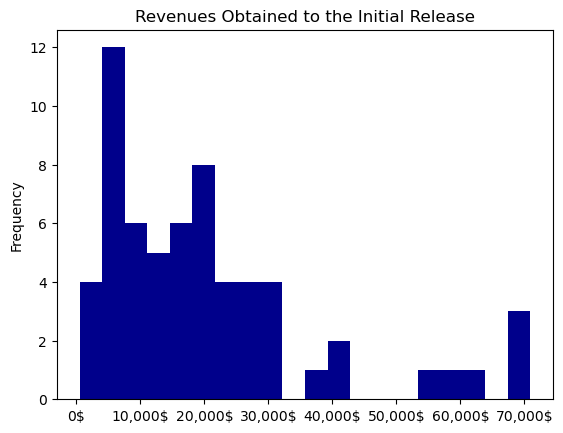

In [53]:
ax = data_movie.BOX.plot(kind='hist',bins =20, color='DarkBlue')
xticks = ax.get_xticks()
xticklabels = ["" if x<0 else "{:,}$".format(round(x)) for x in xticks]
xlim = ax.get_xlim()
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlim(xlim)
ax.set_title('Revenues Obtained to the Initial Release');

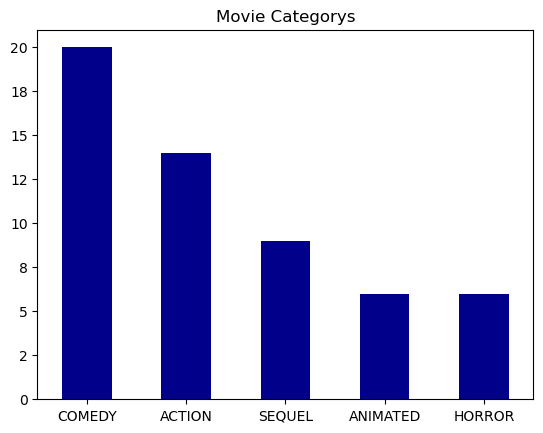

In [54]:
table = data_movie[['SEQUEL', 'ACTION','COMEDY', 'ANIMATED', 'HORROR']].sum()
ax = (table.sort_values(ascending=False)).plot(kind='bar', color='DarkBlue', rot=0)
yticks = ax.get_yticks()
yticklabels = ["" if x<0 else "{:0}".format(round(x)) for x in yticks]
ylim = ax.get_ylim()
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_ylim(ylim)
ax.set_title('Movie Categorys');

### Relation Between Box and Budget

In [55]:
table_budget_box = data_movie.groupby(['BUDGET_CATEGORICAL'], observed=False).agg(
    BOX = pd.NamedAgg(
        column='BOX',
        aggfunc='mean'
    )
    )
table_budget_box.style.format(precision=0, thousands=',')

,BOX
BUDGET_CATEGORICAL,
"[0, 20)","15,950"
"[20, 40)","17,711"
"[40, 60)","10,055"
"[60, 80)","13,466"
"[80, 100)","36,196"
"[100, 250)","44,721"


We can see some cases (`[20, 40)`) movies with more budget got a box less than the movies with small budget.

## Prediction of an outcome of interest

Does internet “buzz” help to predict movie success?

Internet buzz is vaguely defined to be Internet traffic and interest on familiar Web sites such 
as RottenTomatoes.com, ImDB.com, Fandango.com, and traileraddict.com. None of these 
by itself defines Internet buzz. But, collectively, activity on these Web sites, say three weeks 
before a movie’s opening, might be a useful predictor of upcoming success

To build a composite estimator, transformers are usually combined with other transformers or with predictors (such as classifiers or regressors). The most common tool used for composing estimators is a Pipeline.

A pipeline exposes all methods provided by the last estimator: if the last step provides a transform method, then the pipeline would have a transform method and behave like a transformer. If the last step provides a predict method, then the pipeline would expose that method, and given a data X, use all steps except the last to transform the data, and then give that transformed data to the predict method of the last step of the pipeline

All estimators in a pipeline, except the last one, must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.).

In [56]:
y = data_movie['BOX'].copy()
X = data_movie[['SEQUEL', 'ACTION', 'COMEDY',
                 'ANIMATED', 'HORROR', 'BUDGET', 'CMNGSOON', 'FANDANGO', 'CNTWAIT3']].copy()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=1234)

In [58]:
preprocessor = ColumnTransformer(
    [('standar_budget', StandardScaler(), ['BUDGET']),
     ('standar_soon', StandardScaler(), ['CMNGSOON']),
     ('standar_dango', StandardScaler(), ['FANDANGO']),
     ('standar_wait', StandardScaler(), ['CNTWAIT3']),
     ], 
      remainder='drop')

In [59]:
model = Pipeline([('preprocessor', preprocessor),
                 ('adaboost', TransformedTargetRegressor(
                     regressor=AdaBoostRegressor(n_estimators=100, random_state=1234),
                     func=lambda x:np.log(x),
                     inverse_func=lambda x:np.exp(x)))
                     ])

In [60]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standar_budget',
                                                  StandardScaler(),
                                                  ['BUDGET']),
                                                 ('standar_soon',
                                                  StandardScaler(),
                                                  ['CMNGSOON']),
                                                 ('standar_dango',
                                                  StandardScaler(),
                                                  ['FANDANGO']),
                                                 ('standar_wait',
                                                  StandardScaler(),
                                                  ['CNTWAIT3'])])),
                ('adaboost',
                 TransformedTargetRegressor(func=<function <lambda> at 0x0000013931F91300>,
                                            inverse_func=<function <lambda> at 0x00000139337765C0>,
                                            regressor=AdaBoostRegressor(n_estimators=100,
                                                                        random_state=1234)))])

Here summarize the steps:

1. To these features we will apply *Standar Scaler*:
   - [Budget $,# Views of Trailer, # Comments, # "Can't wait" in Fandango.com, % "Can't wait" in Fandango.com].
2. To [Sequel, Action, Comedy, Animated, Horror] already are converted to 0-1 so we won't apply any transformation

3. The target [Box $] is transformated using log and back using exp.

4. We set 400 as number of estimator or trees

In [61]:
y_predict = model.predict(X_test)
print("Mean Absolute Error: ${:,.0f}".format(
    mean_absolute_error(y_test, y_predict))
    )
print("Mean Absolute Percentage Error: {:.2%}".format(
    mean_absolute_percentage_error(y_test, y_predict)))

Mean Absolute Error: $5,120
Mean Absolute Percentage Error: 38.72%


### Model Tuning

* This method directly estimates the expected extra-sample error $Err = E[L(Y, \hat{f}(X))]$
* The average generalization error when the method $\hat{f}(X)$ is applied to an independent test sample from the joint distribution of $X$ and $Y$.

#### K-Fold Cross-Validation

* $K$-fold crossvalidation uses part of the available data to fit the model, and a different part to test it.
* We split the data into $K$ roughly equal-sized parts, for example, when $K = 5$, the scenario looks like this

<center>

|1|2|3|4|5|
|-|-|-|-|-|
|train|train|validation|train|train|

</center>

* For the $k^{th}$ part (third above), we fit the model to the other $K − 1$ parts of the data, and calculate the prediction error of the fitted model when predicting the $k^{th}$ part of the data. 

The cross-validation estimate of prediction error is:

$$CV(\hat{f}) = \frac{1}{N} \sum_{i=1}^{N} L(y_i, \hat{f}^{−κ(i)}(x_i))$$

* For $K = 5$, the $5^{th}$ part of the training data is of size N, where the points is randomly localized.
* The 4 parts remaining is used to fit.
* Denote by $\hat{f}^{−k(x)}$ the fitted function exclude $k^{th}$ part

Given a set of models $f(x, α)$ indexed by a tuning parameter $α$, denote by $\hat{f}^{−k(i)}{(x_i, α)}$ the $α$ th model fit with the $k$ th part of the data removed. Then for this set of models we define.

$$CV(\hat{f}, \alpha) = \frac{1}{N} \sum_{i=1}^{N} L(y_i, \hat{f}^{−κ(i)}(x_i, \alpha_i))$$

The function $CV(\hat{f}, α)$ provides an estimate of the test error curve, and we find the tuning parameter $\hat{α}$ that minimizes it

* $K=5$ is chosen if the size of data training is enought big.  
* Overall, five- or tenfold cross-validation are recommended as a good compromise: see Breiman and Spector (1992) and Kohavi (1995).

In [62]:
pipeline = Pipeline([('preprocessor', preprocessor),
                 ('adaboost', AdaBoostRegressor(n_estimators=100, random_state=1234))])

transformed = TransformedTargetRegressor(
    regressor=pipeline,
    func=lambda x:np.log(x),
    inverse_func=lambda x:np.exp(x))                 

In [63]:
param_grid = {
    "regressor__adaboost__n_estimators":[50, 100, 150, 200, 300, 400, 500],
    "regressor__adaboost__learning_rate":[np.exp(1/2)/np.exp(x) for x in range(1, 10)]
}

grid_search = GridSearchCV(
    transformed, param_grid=param_grid, scoring='neg_mean_absolute_error'
)

In [64]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=TransformedTargetRegressor(func=<function <lambda> at 0x0000013933782520>,
                                                  inverse_func=<function <lambda> at 0x0000013933782480>,
                                                  regressor=Pipeline(steps=[('preprocessor',
                                                                             ColumnTransformer(transformers=[('standar_budget',
                                                                                                              StandardScaler(),
                                                                                                              ['BUDGET']),
                                                                                                             ('standar_soon',
                                                                                                              StandardScaler(),
                                                                                                              ['CMNGSOON']),
                                                                                                             ('standar_dango',
                                                                                                              StandardScaler(),
                                                                                                              ['...
                                                                                               random_state=1234))])),
             param_grid={'regressor__adaboost__learning_rate': [0.6065306597126334,
                                                                0.22313016014842982,
                                                                0.0820849986238988,
                                                                0.030197383422318504,
                                                                0.011108996538242308,
                                                                0.0040867714384640675,
                                                                0.0015034391929775726,
                                                                0.0005530843701478336,
                                                                0.00020346836901064417],
                         'regressor__adaboost__n_estimators': [50, 100, 150,
                                                               200, 300, 400,
                                                               500]},
             scoring='neg_mean_absolute_error')

In [65]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_

Best parameters found:  {'regressor__adaboost__learning_rate': 0.00020346836901064417, 'regressor__adaboost__n_estimators': 50}
Best cross-validation score:  -9610.533811714993


In [66]:
y_predict_best = best_model.predict(X_test)
print("Mean Absolute Error: ${:,.0f}".format(
    mean_absolute_error(y_test, y_predict_best))
    )
print("Mean Absolute Percentage Error: {:.2%}".format(
    mean_absolute_percentage_error(y_test, y_predict_best)))

Mean Absolute Error: $3,982
Mean Absolute Percentage Error: 29.98%


#### Off-the-Shelf

- Since data sets are often very large in terms of number of observations and
number of variables measured on each of them. Thus, computational considerations play an important role.

- Also, the data are usually *messy*: the inputs tend to be mixtures of *quantitative*, *binary*, and *categorical variables*, the latter often with many levels. There are generally many *missing values*, complete observations being rare. 

- Distributions of numeric predictor and response variables are often *long-tailed* and *highly skewed*.

- Only a small fraction of the large
number of predictor variables that have been included in the analysis are
actually relevant to prediction

- Generally require interpretable models. It is not enough to simply produce predictions. It is also desirable to
have information providing qualitative understanding of the relationship between joint values of the input variables and the resulting predicted response value.

> **Off-the-Shelf**
>
> These requirements of speed, interpretability and the messy nature of
> the data sharply limit the usefulness of most learning procedures as off-
> the-shelf methods for data mining. An “off-the-shelf” method is one that
> can be directly applied to the data without requiring a great deal of time-consuming data preprocessing or careful tuning of the learning procedure

*Decision trees* come closest to meeting the requirements for serving as an
 off-the-shelf procedure for data mining

 They are relatively fast to construct and they produce interpretable
models (if the trees are small). As discussed in Section 9.2, they naturally
incorporate mixtures of numeric and categorical predictor variables and
missing values. They are invariant under (strictly monotone) transformations of the individual predictors. As a result, scaling and/or more general
transformations are not an issue, and they are immune to the effects of predictor outliers. They perform internal feature selection as an integral part
of the procedure. They are thereby resistant, if not completely immune,
to the inclusion of many irrelevant predictor variables. These properties of
decision trees are largely the reason that they have emerged as the most
popular learning method for data mining

The main disandantage is *inaccuracy* and the boosting methods help to improves their accuracy, but reduce speed, interpretability,

### Gradient Boosting Regression

A gradient boosted model (GBM) is a generalization of tree boosting so it produces an accurate and effective off-the-shelf procedure

We can use *Gradient Boosting* to optimize .

The only requirement is any *differenciable loss function*

*Gradient Boost* builds fixed sized trees based on the previous tree's error.

*Gradient Boost* build trees until reach the max number of trees or fail to improve  

$y - f(X)$

Given the first tree prediction 

$ \epsilon = \bar{y} - \gamma$

It predicts the residual $\epsilon$ in each iteration 

> Jerome Friendman shows that taking lots of small steps in the right direction results in better *predictions* with testing datasets. e.g. low variance. 
> 
> In a iteration the error is reduced we are taking a step a right direction.
> 
> The variables that a tree is included in each iteration can be different.
> 
> Gradient boost create a large number of trees until it reachs the maximun specified or adding additional trees doesn't reduce the error.  

Algorithm

**Input:** Data $\{(x_n, y_n) \}^{N}_{n=1}$ and a differentiable Loss Function $L(y_n, F(x_n))$

$\{(x_n, y_n) \}^{N}_{n=1}$ refer to training dataset 

The most common Loss function for regression is $L(y, F(x)) = \frac{(y - F(x))^{2}}{2}$ and the differentiable version is $\frac{\partial L}{\partial F} = -(y - F(x)) $. For this Loss function, the $\text{error} = y-F(X)$ es similiar to $\text{error} = F(X) - y$, both have the same weights

**Step 1:** Initialize model with a constant value: $F_0(x) = \arg\min_{\gamma} \sum_{n=1}^{N} L(y_n, \gamma)$. 

We can solve it using derivative  $\frac{\partial \sum_{n=1}^{N} L(y_n, \gamma)}{\partial \gamma} = -\sum_{n = 1}^{N}(y_n - \gamma) = 0$ $\rightarrow$ $\gamma  = \frac{\sum_{n = 1}^{N} y_n}{N}  = F_0(x)$.

**Step 2:** For $m$ to $M$:

- Compute $r_{nm} = - [\frac{\partial L(y_n, F(x_n))}{\partial F(x_n)}]_{F(x)=F_{m-1}(x)} = -[-(y_n - F_{m - 1}(x_n))] = [y_n - F_{m - 1}(x_n)]  $ for $n$ to $N$
- Fit a regression tree to the $r_{nm}$ values and create terminal regions $R_{jm}$ for $j=1,...J_m$. Using this regions we can compute the next step
- For $j = 1, ... J_m$ compute $\gamma_{jm} = \arg\min_{\gamma} \sum_{x_n \in R_{jm}} L(y_n, F_{m-1}(x_{n}) + \gamma)$ . The ouput is  $\gamma_{jm} = \frac{\sum_{x_n \in R_{jm}} [y_n - F_{0}(x_n)]}{\sum I({x_n \in R_{jm} })}$. In actually, this is the average of $r_{nm}$ in each region. 

- Update $F_m(x) = F_{m-1}(x) + \alpha \sum_{j = 1}^{Jm} \gamma_{jm} I(x_n \in R_{jm})$. Here $\alpha$ is the *learning rate*, and is a value between 1 and 0.
<!-- That is, we predict $r$ instead $y$. -->

**Step 3:** Output $F_M(x)$

In [67]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [125]:
model = Pipeline([('preprocessor', preprocessor),
                 ('adaboost', TransformedTargetRegressor(
                     regressor=GradientBoostingRegressor(n_estimators=100, random_state=1234),
                     func=lambda x:np.log(x),
                     inverse_func=lambda x:np.exp(x)))
                     ])

In [126]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standar_budget',
                                                  StandardScaler(),
                                                  ['BUDGET']),
                                                 ('standar_soon',
                                                  StandardScaler(),
                                                  ['CMNGSOON']),
                                                 ('standar_dango',
                                                  StandardScaler(),
                                                  ['FANDANGO']),
                                                 ('standar_wait',
                                                  StandardScaler(),
                                                  ['CNTWAIT3'])])),
                ('adaboost',
                 TransformedTargetRegressor(func=<function <lambda> at 0x0000013934B25300>,
                                            inverse_func=<function <lambda> at 0x0000013934AD9BC0>,
                                            regressor=GradientBoostingRegressor(random_state=1234)))])

In [124]:
y_predict = model.predict(X_test)
print("Mean Absolute Error: ${:,.0f}".format(
    mean_absolute_error(y_test, y_predict))
    )
print("Mean Absolute Percentage Error: {:.2%}".format(
    mean_absolute_percentage_error(y_test, y_predict)))

Mean Absolute Error: $9,478
Mean Absolute Percentage Error: 79.97%


In [71]:
pipeline = Pipeline([('preprocessor', preprocessor),
                 ('gradient', GradientBoostingRegressor(n_estimators=100, random_state=1234))])

transformed = TransformedTargetRegressor(
    regressor=pipeline,
    func=lambda x:np.log(x),
    inverse_func=lambda x:np.exp(x))                 

In [93]:
param_distributions = {
    "regressor__gradient__n_estimators":stats.randint(100, 400), 
    "regressor__gradient__learning_rate": stats.uniform(scale=1, loc =0),
    'regressor__gradient__max_depth': stats.randint(5, 20),
    'regressor__gradient__min_samples_split': stats.randint(1, 10),
    'regressor__gradient__min_samples_leaf': stats.randint(1, 10),
    'regressor__gradient__subsample': stats.uniform(scale=1, loc =0)
}

grid_search = RandomizedSearchCV(
    transformed, param_distributions=param_distributions, scoring='neg_mean_absolute_error', n_iter=100
)

In [94]:
grid_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=TransformedTargetRegressor(func=<function <lambda> at 0x0000013931F92A20>,
                                                        inverse_func=<function <lambda> at 0x0000013931F91440>,
                                                        regressor=Pipeline(steps=[('preprocessor',
                                                                                   ColumnTransformer(transformers=[('standar_budget',
                                                                                                                    StandardScaler(),
                                                                                                                    ['BUDGET']),
                                                                                                                   ('standar_soon',
                                                                                                                    StandardScaler(),
                                                                                                                    ['CMNGSOON']),
                                                                                                                   ('standar_dango',
                                                                                                                    StandardScale...
                                        'regressor__gradient__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013931FC2690>,
                                        'regressor__gradient__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013931FB3CD0>,
                                        'regressor__gradient__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013934949690>},
                   scoring='neg_mean_absolute_error')

In [95]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_

Best parameters found:  {'regressor__gradient__learning_rate': 0.33201489445202026, 'regressor__gradient__max_depth': 5, 'regressor__gradient__min_samples_leaf': 2, 'regressor__gradient__min_samples_split': 8, 'regressor__gradient__n_estimators': 398, 'regressor__gradient__subsample': 0.5225701969992871}
Best cross-validation score:  -9889.08986007464


In [96]:
y_predict_best = best_model.predict(X_test)
print("Mean Absolute Error: ${:,.0f}".format(
    mean_absolute_error(y_test, y_predict_best))
    )
print("Mean Absolute Percentage Error: {:.2%}".format(
    mean_absolute_percentage_error(y_test, y_predict_best)))

Mean Absolute Error: $6,824
Mean Absolute Percentage Error: 71.41%


Setting:
1. *# Estimator*: number of trees
2. *Learning Rate*: Rate at which the prediction is updated
3. *Maximun Depth*: The depth of a node is the number of edges from the root node to that specific node.
4. *Minimun Samples to Split*: The minimum number of samples required to split an internal node
5. *Minimun Samples by Leaf*:The minimum number of samples required to be at a leaf node
6. *Subsample*: The fraction of samples to be used for fitting the individual base learners

### Gradient Boosting Classifier

**Input** Data $\{x_i, y_i\}_{i=1}^{n}$ and a differentiable **Loss Function** $L(y_i, F(x))$

The most common *loss function* used in classification problem is negative *log likelihood* of the $i^{th}$ observed data given the prediction. Here the $\text{r.v.}$ is Bernoulli. 

- $L(y_i, p_i) = -[y_i \log(p_i) + (1 - y_i) \log(1 - p_i)]$

In term of *log(odds)*, $odds = \frac{p}{(1 - p)}$

- $L (y_i, \log(odds))= -y_i \log(odds) + log(1 + e^{\log(odds)} )$ and its derivative $\frac{\partial L}{\partial log(odds)} = -y_i + \frac{e^{log(odds)}}{ 1 + e^{log(odds)}}$. Recall,  $ \frac{e^{log(odds)}}{ 1 + e^{log(odds)}} = p$, so the derivative can be rewritten like $\frac{\partial(L (y_i, \log(odds)))}{\partial \log(odds)} =-y_i  + p_i$


*Steps*

- **Step 1**: Initialize model with a constant value: $F_0(x) = \arg\min_{\gamma} \sum_{i = 1}^{n} L(y_i, \gamma)$. 
The loss function that we will use is in term of *log(odds)*. That means $\gamma = log(p/1-p)$. 
So minimizing the *loss function* in term *log(odds)* we find the $p = \frac{\sum_{i=1}^{n} y_i}{n}$.

<!-- So $F_0(x)$ is in term of *log(odds)*.  -->

- **Step 2** for $m = 1$ to $M$:
  - (A) Compute $r_{i,m} = -[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}]_{F(x) = F_{m-1}(x)}$ for $i = 1, ..., n$. 
  In actually, here the $r_{i,m} = y_i - p_{i,{m-1}}$. 
  This $p_{i,m-1}$ is compute using $F_{m-1}(x_i)$. 
  Recall $F_{m-1}(x_i)$ is term of *log(odds)*. 
  So the only we need is $ p_{i,m-1} = \frac{ e^{F_{m-1}(x_i)}}{ 1 + e^{F_{m-1}(x_i)}}$
  
  - (B) Fit a regression tree to the $r_{im}$ values and create terminal regions $R_{jm}$ for $j=1,...,J_{m}$
  - (C) For $j = 1, ... J_{m}$  compute $\upsilon_{jm} = \argmin_{\upsilon}\sum_{x_i \in R_{ij}} L(y_i, F_{m-1}(x_i) + \upsilon)$. 
  Here $\upsilon$ handle what we need to improve the predictions. 
  $F_{m-1}(x_i)$ is given from the early iteration. 
  The derivative of $L(y_i, F_{m-1}(x_i) + \upsilon)$ respect to $\upsilon$. 
  Since is so difficult take the derivative of $L(y_i, F_{m-1}(x_i) + \upsilon)$ respect to  $\upsilon$ we take the aproximation of Taylor.
  To use this aproximation we need to transform the default aproximation Taylor. The only change $x=z + a$.

  $${\displaystyle f(z+a)=f(a)+f'(a)(z)+{\frac {f''(a)}{2!}}(z)^{2}+\cdots +{\frac {f^{(k)}(a)}{k!}}(z)^{k}+h_{k}(z+a)(z)^{k},}$$

  The partial derivative $f'$ is respect to $z+a$
  
  The Taylor approximation used is of 2nd order and $f=L$, $a = F_{m-1}(x_i)$ and $z=\upsilon$. 
  
  $L(y_i, F_{m-1}(x_i) + \upsilon) \sim L(y_i, F_{m-1}(x_i)) +  L'(y_i, F_{m-1}(x_i)) \upsilon +  L''(y_i, F_{m-1}(x_i)) \upsilon^{2}/2$. 
  Taking the derivative respect to  $v$ we obtain $\upsilon_{j,m} =  \frac{-L'(y_i, F_{m-1}(x_i))}{L''(y_i, F_{m-1}(x_i))}$, $\upsilon_{j,m} = \frac{r_{im}}{p_{i}(1-p_{i})}$. If the terminal node would have one value ($i$ for example), this would be the actual value of $\upsilon_{j,m} $, but terminal node usually have several values so in general, $\upsilon_{j,m} = \frac{ \sum_{x_i \in R_{jm}} r_{im}}{\sum_{x_i \in R_{jm}} (p_{i}(1-p_{i}))}$

  - (D) Update $F_m(x_i) = F_{m-1}(x_i) + \alpha \sum_{j=1}^{J_m} \upsilon_{j,m} \: I(x_i \in R_{jm})$  for $i = 1, ..., n$. 
- **Step 3**: Output $F_{M}(x)$


<blockquote style="padding-right:2em; padding-left:1.5em; padding-bottom:0.5em; padding-top:0.5em; border:1px solid; font-family:Georgia,serif; border-color: #49768C; background-color: #FFFFFF; color: #000000">
<p><b>Teorema de Taylor.</b><sup id="cite_ref-2" class="reference separada"><a href="#cite_note-2"><span class="corchete-llamada">[</span>2<span class="corchete-llamada">]</span></a></sup>​<sup id="cite_ref-3" class="reference separada"><a href="#cite_note-3"><span class="corchete-llamada">[</span>3<span class="corchete-llamada">]</span></a></sup>​<sup id="cite_ref-4" class="reference separada"><a href="#cite_note-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Sea <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle k\in \mathbb {N} }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>k</mi>
        <mo>∈<!-- ∈ --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="double-struck">N</mi>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle k\in \mathbb {N} }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/2a5bc4b7383031ba693b7433198ead7170954c1d" class="mwe-math-fallback-image-inline mw-invert" aria-hidden="true" style="vertical-align: -0.338ex; width:5.73ex; height:2.176ex;" alt="{\displaystyle k\in \mathbb {N} }"></span> y sea  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle f:\mathbb {R} \rightarrow \mathbb {R} }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>f</mi>
        <mo>:</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="double-struck">R</mi>
        </mrow>
        <mo stretchy="false">→<!-- → --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="double-struck">R</mi>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle f:\mathbb {R} \rightarrow \mathbb {R} }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/85e6e186aabef9e51814bbce62e625dc67e825f2" class="mwe-math-fallback-image-inline mw-invert" aria-hidden="true" style="vertical-align: -0.671ex; width:10.186ex; height:2.509ex;" alt="{\displaystyle f:\mathbb {R} \rightarrow \mathbb {R} }"></span> una <a href="/wiki/Funci%C3%B3n_diferenciable" title="Función diferenciable">función diferenciable</a> <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle k}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>k</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle k}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/c3c9a2c7b599b37105512c5d570edc034056dd40" class="mwe-math-fallback-image-inline mw-invert" aria-hidden="true" style="vertical-align: -0.338ex; width:1.211ex; height:2.176ex;" alt="k"></span> veces en el punto <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle a\in \mathbb {R} }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>a</mi>
        <mo>∈<!-- ∈ --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="double-struck">R</mi>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle a\in \mathbb {R} }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b044c60e01b54c7116ee355431f37ed846badc53" class="mwe-math-fallback-image-inline mw-invert" aria-hidden="true" style="vertical-align: -0.338ex; width:5.749ex; height:2.176ex;" alt="{\displaystyle a\in \mathbb {R} }"></span>. Entonces existe una función <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle h_{k}:\mathbb {R} \rightarrow \mathbb {R} }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msub>
          <mi>h</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>k</mi>
          </mrow>
        </msub>
        <mo>:</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="double-struck">R</mi>
        </mrow>
        <mo stretchy="false">→<!-- → --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="double-struck">R</mi>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle h_{k}:\mathbb {R} \rightarrow \mathbb {R} }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4047591d5605931df61d6a6b3df3c562d4855ad1" class="mwe-math-fallback-image-inline mw-invert" aria-hidden="true" style="vertical-align: -0.671ex; width:11.335ex; height:2.509ex;" alt="{\displaystyle h_{k}:\mathbb {R} \rightarrow \mathbb {R} }"></span> tal que
</p>
<blockquote style="padding: 5px 10px; background-color: white; color: black; text-align: left; margin-left:30px; margin-bottom: 0.4em; margin-top:0.2em; min-width:50%;">
<p><span style="float: right; width: 10%; text-align: right;">(<cite id="Equation_1" style="font-style: normal;"><a href="#Eqnref_1">1</a></cite>)</span><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle f(x)=f(a)+f'(a)(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+\cdots +{\frac {f^{(k)}(a)}{k!}}(x-a)^{k}+h_{k}(x)(x-a)^{k},}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>f</mi>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo stretchy="false">)</mo>
        <mo>=</mo>
        <mi>f</mi>
        <mo stretchy="false">(</mo>
        <mi>a</mi>
        <mo stretchy="false">)</mo>
        <mo>+</mo>
        <msup>
          <mi>f</mi>
          <mo>′</mo>
        </msup>
        <mo stretchy="false">(</mo>
        <mi>a</mi>
        <mo stretchy="false">)</mo>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo>−<!-- − --></mo>
        <mi>a</mi>
        <mo stretchy="false">)</mo>
        <mo>+</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <msup>
                <mi>f</mi>
                <mo>″</mo>
              </msup>
              <mo stretchy="false">(</mo>
              <mi>a</mi>
              <mo stretchy="false">)</mo>
            </mrow>
            <mrow>
              <mn>2</mn>
              <mo>!</mo>
            </mrow>
          </mfrac>
        </mrow>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo>−<!-- − --></mo>
        <mi>a</mi>
        <msup>
          <mo stretchy="false">)</mo>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
        <mo>+</mo>
        <mo>⋯<!-- ⋯ --></mo>
        <mo>+</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <msup>
                <mi>f</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mo stretchy="false">(</mo>
                  <mi>k</mi>
                  <mo stretchy="false">)</mo>
                </mrow>
              </msup>
              <mo stretchy="false">(</mo>
              <mi>a</mi>
              <mo stretchy="false">)</mo>
            </mrow>
            <mrow>
              <mi>k</mi>
              <mo>!</mo>
            </mrow>
          </mfrac>
        </mrow>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo>−<!-- − --></mo>
        <mi>a</mi>
        <msup>
          <mo stretchy="false">)</mo>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>k</mi>
          </mrow>
        </msup>
        <mo>+</mo>
        <msub>
          <mi>h</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>k</mi>
          </mrow>
        </msub>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo stretchy="false">)</mo>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo>−<!-- − --></mo>
        <mi>a</mi>
        <msup>
          <mo stretchy="false">)</mo>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>k</mi>
          </mrow>
        </msup>
        <mo>,</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle f(x)=f(a)+f'(a)(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+\cdots +{\frac {f^{(k)}(a)}{k!}}(x-a)^{k}+h_{k}(x)(x-a)^{k},}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f389ed8528adae7d53c2b9621b5aed2470f4c846" class="mwe-math-fallback-image-inline mw-invert" aria-hidden="true" style="vertical-align: -2.005ex; width:85.982ex; height:6.176ex;" alt="{\displaystyle f(x)=f(a)+f'(a)(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+\cdots +{\frac {f^{(k)}(a)}{k!}}(x-a)^{k}+h_{k}(x)(x-a)^{k},}"></span>
</p>
</blockquote>
<p>con <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \quad \lim _{x\to a}h_{k}(x)=0}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mspace width="1em"></mspace>
        <munder>
          <mo movablelimits="true" form="prefix">lim</mo>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>x</mi>
            <mo stretchy="false">→<!-- → --></mo>
            <mi>a</mi>
          </mrow>
        </munder>
        <msub>
          <mi>h</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>k</mi>
          </mrow>
        </msub>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo stretchy="false">)</mo>
        <mo>=</mo>
        <mn>0</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \quad \lim _{x\to a}h_{k}(x)=0}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5276392f9a6df2eba8f9f839e7db7b74aec2b348" class="mwe-math-fallback-image-inline mw-invert" aria-hidden="true" style="vertical-align: -1.838ex; width:15.99ex; height:3.843ex;" alt="{\displaystyle \quad \lim _{x\to a}h_{k}(x)=0}"></span>. Esta es la llamada <b>forma de <a href="/wiki/Peano" class="mw-redirect" title="Peano">Peano</a> del resto</b>.
</p>
<p><br></p><div style="margin-top:-1em; text-align:right;">Brook Taylor</div></blockquote>

Source: https://es.wikipedia.org/wiki/Teorema_de_Taylor

### XGBoost

Extreme Gradient Boost 

The default depth is 6 leves

Prune:

- if $\text{Gain} - \gamma$, the prunning go from leaves to root

- The success of `XGBoost` is its scalability in all scenarios
- 10x more faster and scale to billion of examples in distibuted memory or memory-limited.

Algorithm

**Input:** Data $\{(x_n, y_n) \}^{N}_{n=1}$ and a differentiable Loss Function $l(F(x_n))$, where $\{(x_n, y_n) \}^{N}_{n=1}$ refer to training dataset. 

The most common *Loss function* for regression is $l(F(x)) = \frac{(y - F(x))^{2}}{2} $ and the differentiable version is $\frac{\partial l}{\partial F} = -(y - F(x)) $.

**Step 1:** Initialize model with a constant value: $F_0(x) = \arg\min_{\gamma} \sum_{n=1}^{N} L(y_n, \gamma)$. 

We can solve it using derivative  $\frac{\partial \sum_{n=1}^{N} L(y_n, \gamma)}{\partial \gamma} = -\sum_{n = 1}^{N}(y_n - \gamma) = 0$ $\rightarrow$ $\gamma  = \frac{\sum_{n = 1}^{N} y_n}{N}  = F_0(x)$.

**Step 2:** For $m$ to $M$:

<!-- - Compute $r_{nm} = - [\frac{\partial L(y_n, F(x_n))}{\partial F(x_n)}]_{F(x)=F_{m-1}(x)} = -[-(y_n - F_{m - 1}(x_n))] = [y_n - F_{m - 1}(x_n)]  $ for $n$ to $N$ -->
<!-- - Fit a regression tree to the $r_{nm}$ values and create terminal regions $R_{jm}$ for $j=1,...J_m$. Using this regions we can compute the next step -->
- *The variable chosen and its split point must solve*: 
  $$ \min\sum_{n=1}^{N} l(F_{m-1}(x_n) + \upsilon )  + \alpha T_m + \frac{1}{2}\lambda ||\upsilon||^2 $$
  <!-- \upsilon_{m}^{*} = \argmin_{\upsilon} -->
  
   `[1]`.
   Where $T_m$ (the number of leaves in the nodes of the tree *m*) restrict the growth of the tree and $\frac{1}{2}\lambda ||\upsilon||^2$ soft the predictions $\upsilon$ in order to avoid the overfitting. To minimize the this regularized loss function we need to use the Taylor approximation. 
    <!-- .  For $j = 1, ... T_m$.  -->
    <!-- L(F_{m - 1}(x) + \upsilon) -->
    <!-- \frac{[y - (F_{m-1} (x) + \upsilon)]^2}{2} -->
   
   > To use this aproximation we need to transform the default aproximation Taylor. The only change $x=z + a$.
   > $${\displaystyle f(z+a)=f(a)+f'(a)(z)+{\frac {f''(a)}{2!}}(z)^{2}+\cdots +{\frac {f^{(k)}(a)}{k!}}(z)^{k}+h_{k}(z+a)(z)^{k},}$$
   >
   > The partial derivative $f'$ is respect to $z+a$
   > 
   > The Taylor approximation used is of 2nd order and $f=l$, $a = F_{m-1}(x_n)$ and $z=\upsilon$. 
   > 
   > $l(y_n, F_{m-1}(x_n) + \upsilon) \sim l(y_n, F_{m-1}(x_n)) +  l'(y_n, F_{m-1}(x_n)) \upsilon +  l''(y_n, F_{m-1}(x_n)) \upsilon^{2}/2$ `[2]`. 
   
   A tree split the features space into $T_m$ *regions* (leaves or terminal nodes), for $m$ iteration. $R_1, R_2, ... R_{T_m}$. The shrinkage  $\frac{1}{2}\lambda v^{2}$ at level of terminal nodes, so, $\frac{1}{2}\lambda ||\upsilon||^2$ convert to $\sum_{j=1}^{T_m}\frac{1}{2}\lambda \upsilon^2$. 

   So $\sum_{n=1}^{N} l(F_{m-1}(x_n) + \upsilon)$ can be written like $\sum_{j=1}^{T_m}[ \sum_{x_n \in R_j} l(F_{m-1}(x_n) + \upsilon_{jm} )]$

   $$ \min \sum_{j=1}^{T_m}[ \sum_{x_n \in R_{jm}} l(F_{m-1}(x_n) + \upsilon_{jm} )]  + \alpha T_m + \sum_{j=1}^{T_m}\frac{1}{2}\lambda \upsilon_{jm}^2$$

   $$ \min \sum_{j=1}^{T_m}[ \sum_{x_n \in R_{jm}} l(F_{m-1}(x_n) + \upsilon_{jm} ) + \frac{1}{2}\lambda \upsilon_{jm}^2]  + \alpha T_m $$

   The minimization at level of region assure the minimization at level of tree (under specific structure)
   
   If we plug the approximation here and take the derivative respect to  $v$ we obtain $\upsilon_{j,m} =  \frac{\sum_{x_n \in R_{jm}} -l'(y_n, F_{m-1}(x_n))}{[\sum_{x_n \in R_{jm}} l''(y_n, F_{m-1}(x_n))] + \lambda}$ 

   $l'(y_n, F_{m-1}(x_n)) = \frac{\partial l(y_n, F_{m-1}(x_n))}{ \partial F_{m-1}+ \upsilon } = \frac{\frac{\partial l(y_n, F_{m-1}(x_n))}{ \partial F_{m-1}(x_n)}}{ \frac{\partial F_{m-1} (x_n)+ \upsilon}{\partial F_{m-1}(x_n) } } = \frac{\partial l(y_n, F_{m-1}(x_n))}{ \partial F_{m-1} } = - (y_n - F_{m-1}(x_n))$, and $l''(y_n, F_{m-1}(x_n)) = 1$, $\upsilon_{j,m} =  \frac{y_n - F_{m-1}(x_n)}{1 + \lambda}$

   If was $\lambda = 0$, the ouput is in actually, the average of $y_n - F_{m-1}(x_n) $ in each region. 

   The scoring function to measure the quality of an specific tree is 
   $$ - \frac{1}{2}  \sum_{j=1}^{T_m}  \frac{(\sum_{x_n \in R_{jm}} -l'(y_n, F_{m-1}(x_n)))^{2}}{[\sum_{x_n \in R_{jm}} l''(y_n, F_{m-1}(x_n))] + \lambda} + \gamma T_m$$  
<!--  $\upsilon_{jm} = \frac{\sum_{x_n \in R_{jm}} [y_n - F_{0}(x_n)]}{\sum I({x_n \in R_{jm} })}$.  -->

- Update $F_m(x_n) = F_{m-1}(x_n) + \alpha \upsilon_{jm_{(x_n \in R_{jm})}}$. Here $\alpha$ is the *learning rate*, and is a value between 1 and 0.
<!-- That is, we predict $r$ instead $y$. -->

**Step 3:** Output $F_M(x)$

Since is so hard to Normally it is impossible to enumerate all the possible tree structures, xboots uses `greedy strategy`. It starts from a single leaf and iteratively adds branches to the tree. Assume that $I_L$ and $I_R$ where $R = I_L \cap I_R$

$$ - \frac{1}{2} [\frac{(\sum_{x_n \in I_L} -l'(y_n, F_{m-1}(x_n)))^{2}}{[\sum_{x_n \in I_L} l''(y_n, F_{m-1}(x_n))] + \lambda} + \frac{(\sum_{x_n \in I_R} -l'(y_n, F_{m-1}(x_n)))^{2}}{[\sum_{x_n \in I_R} l''(y_n, F_{m-1}(x_n))] + \lambda} - \frac{(\sum_{x_n \in R} -l'(y_n, F_{m-1}(x_n)))^{2}}{[\sum_{x_n \in R} l''(y_n, F_{m-1}(x_n))] + \lambda}] - \gamma$$

According to user feedback, using column sub-sampling prevents over-fitting even more so than the traditional row sub-sampling 

$r_n = y_n - F(X_n)$

$\text{Similarity Score} = \frac{ (\sum_{n}^{N} r_n)^2 }{ N + \lambda}$ for each node (parent or terminal)

$\lambda$ is a parameter 

$\text{Gain} = (\text{Left}_\text{Similarity}  + \text{Right}_\text{Similarity}) - \text{root}_\text{Similarity}$. It is the gain of spliting a node. Each time a node going to split we need to compute the gain of this spliting  

$ \text{Gain} -  \gamma$

$\gamma$ is another parameter to prune the tree, this is evaluate to $\text{Gain}$. If the $ (\text{Gain} -  \gamma) \gt 0$ the split keep in the tree.

In [1]:
from xgboost import XGBClassifier,  XGBRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)

In [6]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

In [7]:
# fit model
bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [8]:
# make predictions
preds = bst.predict(X_test)

In [16]:
(preds == y_test)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

## Bagging

### Random Forest

Random forests (Breiman, 2001) is a substantial modification of bagging that builds a large collection of *de-correlated trees* (trees which the correlation between them are reduced or eliminated), and then averages them.

On many problems the performance of random forests is very similar to boosting, and they are simpler to train and tune.

* The essential idea in *bagging* is to average many noisy but approximately unbiased models. The average reduce the variance. 

* Trees are ideal candidates for bagging, since they can capture complex interaction structures in the data, and if grown sufficiently deep, have relatively low bias. 

* Moreover, since each tree generated in bagging, that is, the tree are fitted using the data generate using bootstrap procedure the expectation of an average of $B$ such trees (of the predictions) is the same as the expectation of any one of them (of the predictions). $E[\bar{X}] = E[X] = \mu $

* This means the bias of bagged trees is the same as that of the individual trees, and the only hope of improvement is through variance reduction. 

* An average of $B$ i.i.d. rvs, each with variance $σ^2$, has variance $\frac{1}{B}σ^2$. 

* If the variables are simply i.d. (identically distributed, but not necessarily independent) with positive pairwise correlation $ρ$, the variance
of the average is 

$$ρ\sigma^2 + \frac{(1 - ρ)}{B}\sigma^2$$

* Supposing all $\text{Var}$ and pairwise $\text{Cov}$ is the same for all rvs i.d.

* As $B$ increases, the second term disappears, but the first remains, and hence the size of the correlation of pairs of bagged trees limits the benefits
of averaging

* Random forests improve the variance reduction of bagging when reducing the correlation between the trees, without increasing the variance too much. 

* This is **achieved** in the tree-growing process **through random selection of the input variables**.

* Specifically, when growing a tree on a `bootstrapped dataset`:

<center>


**Before each split, select m ≤ p of the input variables at random as candidates for splitting.**


</center>

* Typically values for $m$ are $\sqrt{p}$ or even as low as $1$.
* Recall, regression and classification trees partition the space of all joint predictor variable values into disjoint regions $R_j, j = 1, 2, . . . , J$, as represented by the terminal nodes of the tree.

* A constant $γ_j$ is assigned to each such region and the predictive rule is

$$x ∈ R_j ⇒ f(x) = γ_j$$

* Thus a tree can be formally expressed as

$$ T(x; Θ) = \sum_{j=1}^{J} γ_j I(x ∈ R_j) $$ 

* with parameters $Θ = \{R_j, γ_j\}^J$ . $J$ is usually treated as a meta-parameter.
* After B such trees $B$ are grown,  the random forest (regression) predictor is:

$$\hat{f}_{\text{rf}}^{B}(x) = \frac{1}{B} \sum_{b = 1}^{B} T(x; Θ)$$

* $Θ_b$ characterizes the bth random forest tree in terms of split variables, cutpoints at each node, and terminal-node values.

* Intuitively, reducing $m$ will reduce the correlation between any pair of trees in the ensemble, and hence reduce the variance of the average.

* In generally, gradient boosting is better than random forest

* `Out the bag` sample is the dataset that were not used to fit the $B$ models, almost alway is 1/3 of the original data.

* This data are used to evaluate the predictions of random forest model $\hat{f}_{\text{rf}}^{B}(x)$.

* It pass this dataset on the fitten model by bostraping dataset and compute **Out of the Bag error** `OOBE`

* Then, refit the models using differents $\text{m} + 1$  columns (features) instead $\text{m}$ and compare the `OOBE` of the models 

* The process is iterative, and the best model is choosen



The implementation of random forest is in `sklearn.ensemble.RandomForestRegressor` and this by default support multiple outputs.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [1]:

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Sinusoidal data with noise

# Step 2: Train multiple Decision Trees using Bagging
n_trees = 100
trees = []
predictions = np.zeros((n_trees, X.shape[0]))

for i in range(n_trees):
    # Bootstrap sample
    X_resampled, y_resampled = resample(X, y)
    
    # Train a decision tree on the bootstrap sample
    tree = DecisionTreeRegressor()
    tree.fit(X_resampled, y_resampled)
    
    # Store the tree and its predictions
    trees.append(tree)
    predictions[i] = tree.predict(X)

# Step 3: Compute the expectation (mean prediction)
# Mean prediction for each tree
mean_predictions_each_tree = np.mean(predictions, axis=1)

# Mean prediction of the average of all trees
mean_prediction_ensemble = np.mean(np.mean(predictions, axis=0))

# Step 4: Compare the expectations
print(f"Expectation of any one tree's prediction: {np.mean(mean_predictions_each_tree):.6f}")
print(f"Expectation of the average prediction of all trees: {mean_prediction_ensemble:.6f}")

# Verify that they are approximately equal
assert np.isclose(np.mean(mean_predictions_each_tree), mean_prediction_ensemble), "Expectations are not equal!"
print("The expectations are approximately equal, as expected.")

Expectation of any one tree's prediction: 0.244511
Expectation of the average prediction of all trees: 0.244511
The expectations are approximately equal, as expected.


#### Apply on same Movie Buzz Data

In [116]:
rf_model = Pipeline([('preprocessor', preprocessor),
                 ('adaboost', TransformedTargetRegressor(
                     regressor=RandomForestRegressor(n_estimators=400, random_state=1234, min_samples_leaf=5, min_samples_split=5),
                     func=lambda x:np.log(x),
                     inverse_func=lambda x:np.exp(x)))
                     ])

In [117]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standar_budget',
                                                  StandardScaler(),
                                                  ['BUDGET']),
                                                 ('standar_soon',
                                                  StandardScaler(),
                                                  ['CMNGSOON']),
                                                 ('standar_dango',
                                                  StandardScaler(),
                                                  ['FANDANGO']),
                                                 ('standar_wait',
                                                  StandardScaler(),
                                                  ['CNTWAIT3'])])),
                ('adaboost',
                 TransformedTargetRegressor(func=<function <lambda> at 0x0000013934AD9260>,
                                            inverse_func=<function <lambda> at 0x0000013934AD9A80>,
                                            regressor=RandomForestRegressor(min_samples_leaf=5,
                                                                            min_samples_split=5,
                                                                            n_estimators=400,
                                                                            random_state=1234)))])

Here summarize the steps:

1. To these features we will apply *Standar Scaler*:
   - [Budget $,# Views of Trailer, # Comments, # "Can't wait" in Fandango.com, % "Can't wait" in Fandango.com].
2. To [Sequel, Action, Comedy, Animated, Horror] already are converted to 0-1 so we won't apply any transformation

3. The target [Box $] is transformated using log and back using exp.

4. We set 400 as number of estimator or trees

In [118]:
y_predict_rf = rf_model.predict(X_test)
print("Mean Absolute Error: ${:,.0f}".format(
    mean_absolute_error(y_test, y_predict_rf))
    )
print("Mean Absolute Percentage Error: {:.2%}".format(
    mean_absolute_percentage_error(y_test, y_predict_rf)))

Mean Absolute Error: $4,267
Mean Absolute Percentage Error: 31.71%


In [127]:
pipeline_rf = Pipeline([('preprocessor', preprocessor),
                 ('rf', RandomForestRegressor(n_estimators=400, random_state=1234))])

transformed_rf = TransformedTargetRegressor(
    regressor=pipeline_rf,
    func=lambda x:np.log(x),
    inverse_func=lambda x:np.exp(x))                 

In [128]:
param_distributions = {
    "regressor__rf__n_estimators":stats.randint(100, 400), 
    'regressor__rf__max_depth': stats.randint(5, 20),
    'regressor__rf__min_samples_split': stats.randint(1, 10),
    'regressor__rf__min_samples_leaf': stats.randint(1, 10),
}

random_search_rf = RandomizedSearchCV(
    transformed_rf, param_distributions=param_distributions, 
    scoring='neg_mean_absolute_error', 
    n_iter=100
)

In [129]:
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=TransformedTargetRegressor(func=<function <lambda> at 0x0000013934B5CFE0>,
                                                        inverse_func=<function <lambda> at 0x0000013934B5D080>,
                                                        regressor=Pipeline(steps=[('preprocessor',
                                                                                   ColumnTransformer(transformers=[('standar_budget',
                                                                                                                    StandardScaler(),
                                                                                                                    ['BUDGET']),
                                                                                                                   ('standar_soon',
                                                                                                                    StandardScaler(),
                                                                                                                    ['CMNGSOON']),
                                                                                                                   ('standar_dango',
                                                                                                                    StandardScale...
                                        'regressor__rf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013934B56D10>,
                                        'regressor__rf__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013934B56C10>,
                                        'regressor__rf__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013934A6BCD0>},
                   scoring='neg_mean_absolute_error')

In [130]:
print("Best parameters found: ", random_search_rf.best_params_)
print("Best cross-validation score: ", random_search_rf.best_score_)
best_model_rf = random_search_rf.best_estimator_

Best parameters found:  {'regressor__rf__max_depth': 9, 'regressor__rf__min_samples_leaf': 2, 'regressor__rf__min_samples_split': 4, 'regressor__rf__n_estimators': 382}
Best cross-validation score:  -10506.230041856857


In [131]:
y_predict_best_rf = best_model_rf.predict(X_test)
print("Mean Absolute Error: ${:,.0f}".format(
    mean_absolute_error(y_test, y_predict_best_rf))
    )
print("Mean Absolute Percentage Error: {:.2%}".format(
    mean_absolute_percentage_error(y_test, y_predict_best_rf)))

Mean Absolute Error: $4,387
Mean Absolute Percentage Error: 34.88%


* Consider the *regression problem*. 
* Suppose we fit a model to our training data $Z = \{(x_1, y_1), (x_2, y_2), . . . , (x_N , y_N )\}$, obtaining the prediction $\hat{f}(x)$ at input $x$

* Bootstrap aggregation or bagging averages this prediction over a collection of bootstrap samples, thereby reducing its variance

* For each bootstrap sample $Z^{∗b}, b = 1, 2, . . . , B$, we fit our model, giving prediction $\hat{f}^{∗b}$

$$ {f_{\text{bag}}}(x) = \frac{1}{B} \sum_{b = 1}^{B} \hat{f^{*b}}(x)$$


Denote by $\hat{P}$ the empirical distribution putting equal probability $1/N$ on each of the data points $(x_i, y_i)$

In fact the `true` bagging estimate is defined by $E_P[\hat{f}^{∗}(x)]$, where $Z^∗ = {(x^{∗}_1, y^{∗}_1), (x^{∗}_2, y^{∗}_2), . . . , (x^{∗}_N , y^{∗}_N )}$ and each $(x_i^{*} , y_i^{∗}) ∼ \hat{P}$. 

Expression is a Monte Carlo estimate of the true bagging estimate, approaching it as $B → ∞$

For Regression tree where $\hat{f}(x)$ denotes the tree’s prediction at input vector $x$ 

The bagged estimate is the average prediction at $x$ from these $B$ trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection

In [ ]:
# Data Simulation
x = np.random.randn(1_000, 1)
f = 9*np.sin(x)
e = 3*np.random.randn(1_000)
y = f.flatten() + e

# split data
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, random_state=123, test_size=0.25)
# fitting a model tree for each bag

In [ ]:
# np.random.choice(x_train, size=10, replace=True)
indices = np.indices((x_train.shape[0],))
indices = indices.flatten()

In [ ]:
bagging_indices = np.random.choice(indices, size=x_train.shape[0], replace=True)

In [ ]:
trees_predicts = []
b = 20
while b >=1:
    bagging_indices = np.random.choice(indices, size=x_train.shape[0], replace=True)
    x_bagging = x_train[bagging_indices, :]
    y_bagging = y_train[bagging_indices]
    tree = DecisionTreeRegressor() 
    tree.fit(x_bagging, y_bagging)
    # Predicts using the tree model
    x_predict_bagging = tree.predict(x_test)
    # reshape in order to concatenate for data test
    trees_predicts.append(np.reshape(x_predict_bagging,  (-1, 1)))
    b-=1
    
# compute the mean of the prediction
trees_predicts_df=pd.DataFrame(np.hstack(trees_predicts))
predict_bagging = np.hstack(trees_predicts).mean(axis=1)

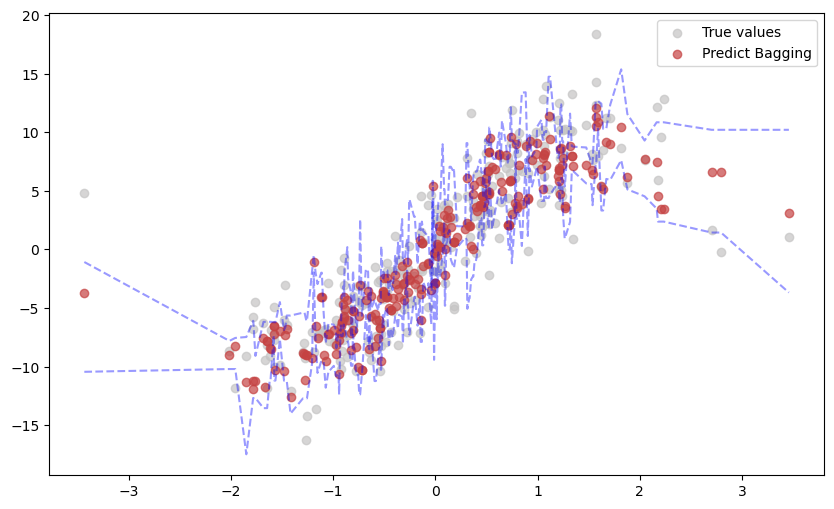

In [ ]:
fig, ax= plt.subplots(figsize = (10, 6))

labels = ['True values', 'Predict Bagging']
colors = [(197/255, 196/255, 196/255), (197/255, 67/255, 67/255)]
variables = [y_test, predict_bagging]

for label, color, variable in zip(labels, colors, variables):
    ax.scatter(x_test.flatten(), variable, alpha = 0.7, label = label, color=color)

# --> Plot the maximun and minimun 
# 1. Get Max an Min of the predicts (quantile(0) is the minimun and quantile(1) is the maximun)
quantiles = trees_predicts_df.quantile([0,  1], axis=1).T
# 2. The outcome values is passed like index
quantiles.index = x_test.flatten()
# 3. Sort the by index, that is (by outcome values)
quantiles.sort_index(axis=0, ascending=True, inplace=True)
# 4. plot the maximun and minimun values by the outcomes 
ax.plot(quantiles.index, quantiles[0], 'b--', alpha = 0.4)
ax.plot(quantiles.index, quantiles[1],  'b--', alpha = 0.4)
ax.legend();

Now suppose our tree produces a classifier $\hat{G}(x)$ for a $K$-class response. 

Here it is useful to consider an underlying indicator-vector function $\hat{f}(x)$, with value a single one and $K − 1$ zeroes, such that $\hat{G}(x) = \arg\max_k \hat{f}(x)$. 

Then the bagged estimate $\hat{f}_{\text{bag}}(x)$ is a $K$-vector $[p_1(x), p_2(x), . . . , p_K(x)]$, with $p_k(x)$ equal to the proportion of trees predicting class $k$ at x. 

The bagged classifier selects the class with the most “votes” from the B trees, $\hat{G}_{\text{bag}}(x) = \arg\max_k \hat{f}_{\text{bag}}(x) $

In [ ]:
# Load the data
data_crime = pd.read_stata(r'data_dta/CRIME1.dta')

# Generate the variable arr86, where a person is labeled equal to 0, if he has not committed a crime in 1986
# otherwise 1.
data_crime['arr86'] = np.where(data_crime.narr86>0,1, 0 )

# Selecting the features and target
features= ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86']
target = 'arr86'

# split data
data_crime_train, data_crime_test = model_selection.train_test_split(data_crime, random_state=123, test_size=0.25)

# fitting a model tree for each bag 
trees = []
class_votes = np.zeros(shape=(data_crime_test.shape[0], 2))
size_bag = b = 200
while b>=0:
    bag = data_crime_train.sample(n = data_crime_train.shape[0], replace=True)
    tree = DecisionTreeClassifier() 
    # trees.append(tree.fit(bag[features], bag[target]))
    tree.fit(bag[features], bag[target])
    #   [0, 1]
    tree_predict = tree.predict_proba(data_crime_test[features])
    predicts = np.where(tree_predict>=0.5, 1, 0)
    class_votes += predicts
    b-=1

In [ ]:
# class_votes is vector with 2 shape
# Recall, predicts_proba are like [0.01, 2.1]
# argmax choose the index thta have the max value between the two,
# The index coincide match with the class
y_predicts = np.argmax(class_votes/size_bag, axis=1) 

In [ ]:
np.mean(y_predicts == data_crime_test[target].values)

0.7228739002932552

# References

  1. Trevor Hastie, Robert Tibshirani, Jerome Friedman - The Elements of Statistical Learning Data Mining, Inference, and Prediction

  2. Robert V. Hogg -  Introduction to Mathematical Statistics

  3. [StatQuest with Josh Starmer -> YouTube](https://www.youtube.com/watch?v=sQ870aTKqiM)

  4. [AdaBoost, Clearly Explained](https://www.youtube.com/watch?v=LsK-xG1cLYA)
